In [2]:
import empiricaldist
import janitor
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats
import seaborn as sns
import sklearn.metrics
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats as ss
import palmerpenguins

In [68]:
%matplotlib inline
sns.set_style(style='whitegrid')
sns.set_context(context='notebook')
plt.rcParams['figure.figsize'] = (11, 9.4)

penguin_color = {
    'Adelie': '#ff6602ff',
    'Gentoo': '#0f7175ff',
    'Chinstrap': '#c65dc9ff'
}

# Cargar los datos

## Utilizando el paquete palmerpenguins 

In [69]:
raw_penguins_df = palmerpenguins.load_penguins_raw()
raw_penguins_df

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,PAL0708,1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,2007-11-11,39.1,18.7,181.0,3750.0,MALE,NaN,NaN,Not enough blood for isotopes.
1,PAL0708,2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,2007-11-11,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454,NaN
2,PAL0708,3,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,2007-11-16,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302,NaN
3,PAL0708,4,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A2,Yes,2007-11-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adult not sampled.
4,PAL0708,5,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,2007-11-16,36.7,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
339,PAL0910,64,Chinstrap penguin (Pygoscelis antarctica),Anvers,Dream,"Adult, 1 Egg Stage",N98A2,Yes,2009-11-19,55.8,19.8,207.0,4000.0,MALE,9.70465,-24.53494,NaN
340,PAL0910,65,Chinstrap penguin (Pygoscelis antarctica),Anvers,Dream,"Adult, 1 Egg Stage",N99A1,No,2009-11-21,43.5,18.1,202.0,3400.0,FEMALE,9.37608,-24.40753,Nest never observed with full clutch.
341,PAL0910,66,Chinstrap penguin (Pygoscelis antarctica),Anvers,Dream,"Adult, 1 Egg Stage",N99A2,No,2009-11-21,49.6,18.2,193.0,3775.0,MALE,9.46180,-24.70615,Nest never observed with full clutch.
342,PAL0910,67,Chinstrap penguin (Pygoscelis antarctica),Anvers,Dream,"Adult, 1 Egg Stage",N100A1,Yes,2009-11-21,50.8,19.0,210.0,4100.0,MALE,9.98044,-24.68741,NaN


## Datos previamente procesados

In [70]:
prepocess_penguins_df = palmerpenguins.load_penguins()
prepocess_penguins_df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009


## Utilizando los conjuntos de datos seaborn

In [71]:
sns.load_dataset('penguins')

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


## Colecta y validacion de datos

### ¿Qué tipo de datos son las variables del conjunto de datos?

In [72]:
prepocess_penguins_df.dtypes

species               object
island                object
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
year                   int64
dtype: object

### ¿Cuántas variables de cada tipo de dato tenemos en el conjunto de datos?

In [73]:
prepocess_penguins_df.dtypes.value_counts()

float64    4
object     3
int64      1
Name: count, dtype: int64

### ¿Cuántas variables y observaciones tenemos en el conjunto de datos?

In [74]:
prepocess_penguins_df.shape

(344, 8)

### ¿Existen valores nulos explicitos en el conjunto de datos?

In [75]:
prepocess_penguins_df.isnull().any()

species              False
island               False
bill_length_mm        True
bill_depth_mm         True
flipper_length_mm     True
body_mass_g           True
sex                   True
year                 False
dtype: bool

### De tener obsevaciones con valores nulos, ¿Cuantas tenemos por cada una?

In [76]:
prepocess_penguins_df.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
year                  0
dtype: int64

### ¿Cual es la proporcion de valores nulos por cada variable?

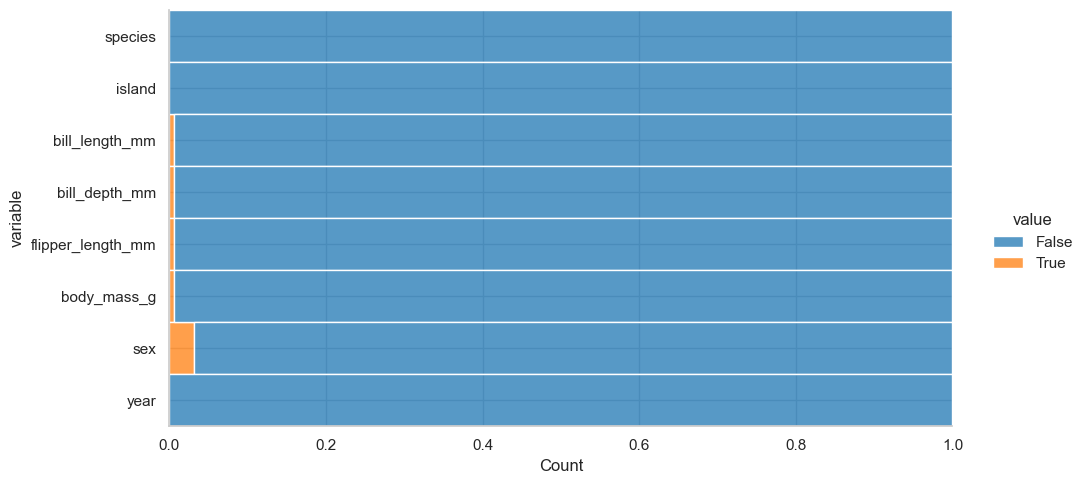

In [77]:
prepocess_penguins_df.isnull().melt().pipe(lambda df: (sns.displot(data=df, hue='value', multiple='fill', y='variable', aspect=2)))

<Axes: >

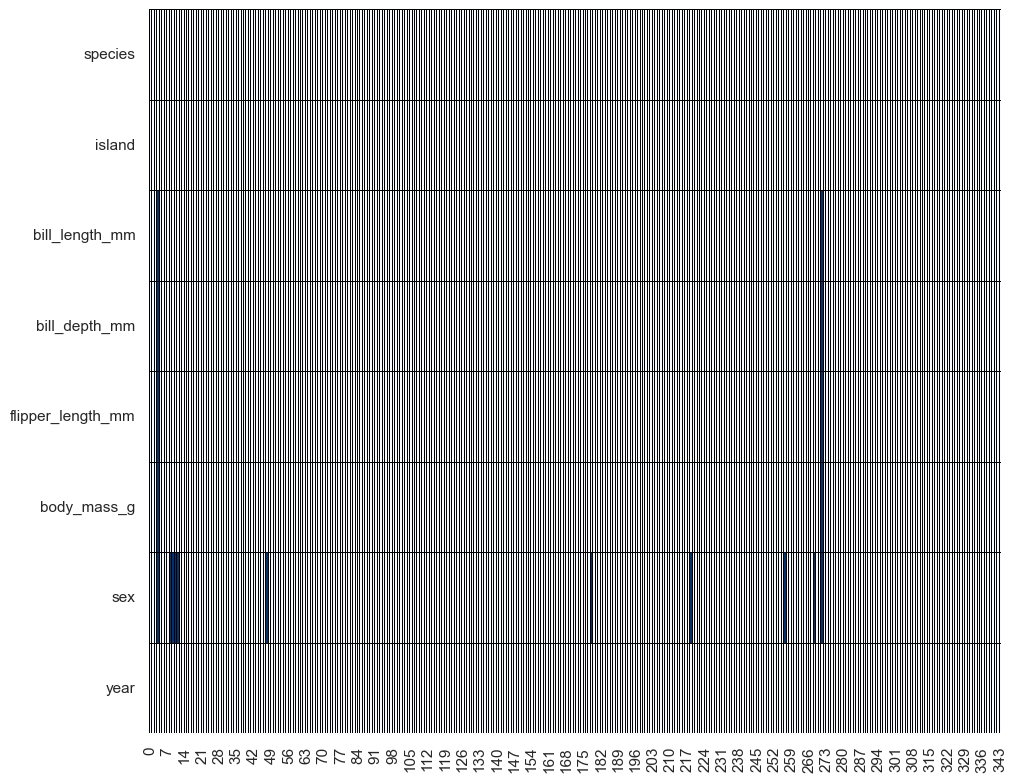

In [78]:
prepocess_penguins_df.isnull().transpose().pipe(lambda df: (sns.heatmap(data=df, cmap='Blues', cbar=False, linewidths=0.5, linecolor='black')))

In [79]:
prepocess_penguins_df.dropna()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007
...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009


### ¿Cuámtas observaciones perdemos si eliminamos los datos faltantes?

In [80]:
processed_penguins_df = prepocess_penguins_df.dropna()
processed_penguins_df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007
...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009


## Conteos y proporciones

### Preludio: ¿Qué estadisticos describen el conjunto de datos?

#### Todas las variables

In [81]:
processed_penguins_df.describe(include='all')

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
count,333,333,333.000000,333.000000,333.000000,333.000000,333,333.000000
unique,3,3,NaN,NaN,NaN,NaN,2,NaN
top,Adelie,Biscoe,NaN,NaN,NaN,NaN,male,NaN
freq,146,163,NaN,NaN,NaN,NaN,168,NaN
mean,NaN,NaN,43.992793,17.164865,200.966967,4207.057057,NaN,2008.042042
std,NaN,NaN,5.468668,1.969235,14.015765,805.215802,NaN,0.812944
min,NaN,NaN,32.100000,13.100000,172.000000,2700.000000,NaN,2007.000000
25%,NaN,NaN,39.500000,15.600000,190.000000,3550.000000,NaN,2007.000000
50%,NaN,NaN,44.500000,17.300000,197.000000,4050.000000,NaN,2008.000000
75%,NaN,NaN,48.600000,18.700000,213.000000,4775.000000,NaN,2009.000000


#### Solo las numericas

In [82]:
processed_penguins_df.describe(include=[np.number])

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
count,333.000000,333.000000,333.000000,333.000000,333.000000
mean,43.992793,17.164865,200.966967,4207.057057,2008.042042
std,5.468668,1.969235,14.015765,805.215802,0.812944
min,32.100000,13.100000,172.000000,2700.000000,2007.000000
25%,39.500000,15.600000,190.000000,3550.000000,2007.000000
50%,44.500000,17.300000,197.000000,4050.000000,2008.000000
75%,48.600000,18.700000,213.000000,4775.000000,2009.000000
max,59.600000,21.500000,231.000000,6300.000000,2009.000000


#### Solo categoricas - 1

In [83]:
processed_penguins_df.describe(include=object)

,species,island,sex
count,333,333,333
unique,3,3,2
top,Adelie,Biscoe,male
freq,146,163,168


#### Solo categricas 2

In [84]:
processed_penguins_df.astype({'species': 'category', 'island': 'category', 'sex': 'category'}).describe(include='category')

,species,island,sex
count,333,333,333
unique,3,3,2
top,Adelie,Biscoe,male
freq,146,163,168


## ¿Cómo visualizar los conteos?

#### Pandas


<Axes: xlabel='species'>

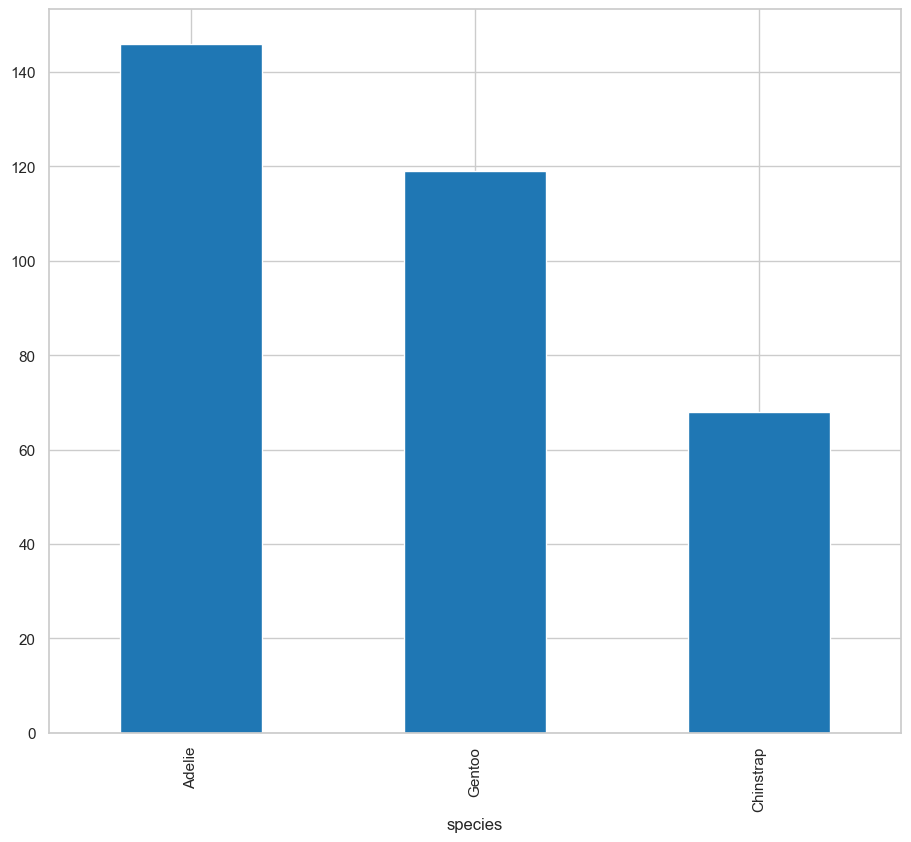

In [85]:
processed_penguins_df.species.value_counts().plot(kind='bar')

### Seaborn

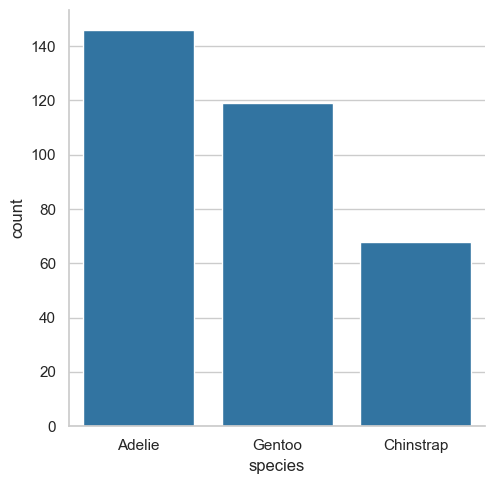

In [86]:
sns.catplot(data=processed_penguins_df, x='species', kind='count')

## Medidas de tendencia central

#### Media o promedio

In [87]:
processed_penguins_df.bill_depth_mm.mean()

np.float64(17.164864864864867)

In [88]:
np.mean(processed_penguins_df.bill_depth_mm)

np.float64(17.164864864864867)

In [89]:
processed_penguins_df.select_dtypes(include=[np.number]).mean()

bill_length_mm         43.992793
bill_depth_mm          17.164865
flipper_length_mm     200.966967
body_mass_g          4207.057057
year                 2008.042042
dtype: float64

#### Mediana

In [90]:
processed_penguins_df.select_dtypes(include=[np.number]).median()

bill_length_mm         44.5
bill_depth_mm          17.3
flipper_length_mm     197.0
body_mass_g          4050.0
year                 2008.0
dtype: float64

#### Moda

In [91]:
processed_penguins_df.mode()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Biscoe,41.1,17.0,190.0,3800.0,male,2009


## Medidas de dispersion

#### ¿Cuál es el valor maximo de las variables?

In [92]:
max_value = processed_penguins_df.max(numeric_only=True)

#### ¿Cuál es el valor maximo de las variables?

In [93]:
min_value =processed_penguins_df.min(numeric_only=True)

¿Cuál es el rango de las variables?

In [94]:
max_value - min_value

bill_length_mm         27.5
bill_depth_mm           8.4
flipper_length_mm      59.0
body_mass_g          3600.0
year                    2.0
dtype: float64

#### ¿Cuál es la desviacion estandar de las variables?

In [95]:
processed_penguins_df.std(numeric_only=True)

bill_length_mm         5.468668
bill_depth_mm          1.969235
flipper_length_mm     14.015765
body_mass_g          805.215802
year                   0.812944
dtype: float64

In [96]:
processed_penguins_df.mean(numeric_only=True) + processed_penguins_df.std(numeric_only=True)
processed_penguins_df.mean(numeric_only=True) - processed_penguins_df.std(numeric_only=True)

bill_length_mm         38.524124
bill_depth_mm          15.195629
flipper_length_mm     186.951202
body_mass_g          3401.841255
year                 2007.229098
dtype: float64

#### ¿Cuál es el rango intercuartilico?

In [97]:
value_1 = processed_penguins_df.select_dtypes(include=[np.number]).quantile(0.25)
value_2 = processed_penguins_df.select_dtypes(include=[np.number]).quantile(0.75)

In [98]:
#este es el rango intercuartilico
value_2 - value_1

bill_length_mm          9.1
bill_depth_mm           3.1
flipper_length_mm      23.0
body_mass_g          1225.0
year                    2.0
dtype: float64

## ¿Cómo puedo visualizar la distribucion de una variable?


#### Histograma

<Axes: xlabel='flipper_length_mm', ylabel='Count'>

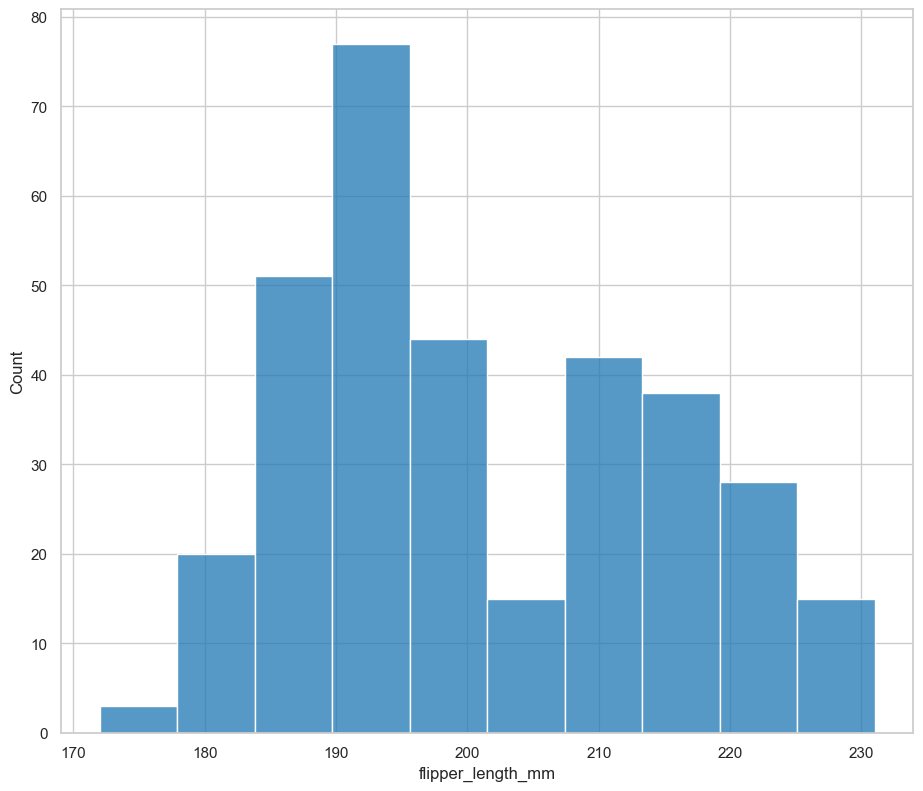

In [99]:
sns.histplot(data=processed_penguins_df, x='flipper_length_mm')

#### Diagrama de caja / boxplot

<Axes: xlabel='flipper_length_mm'>

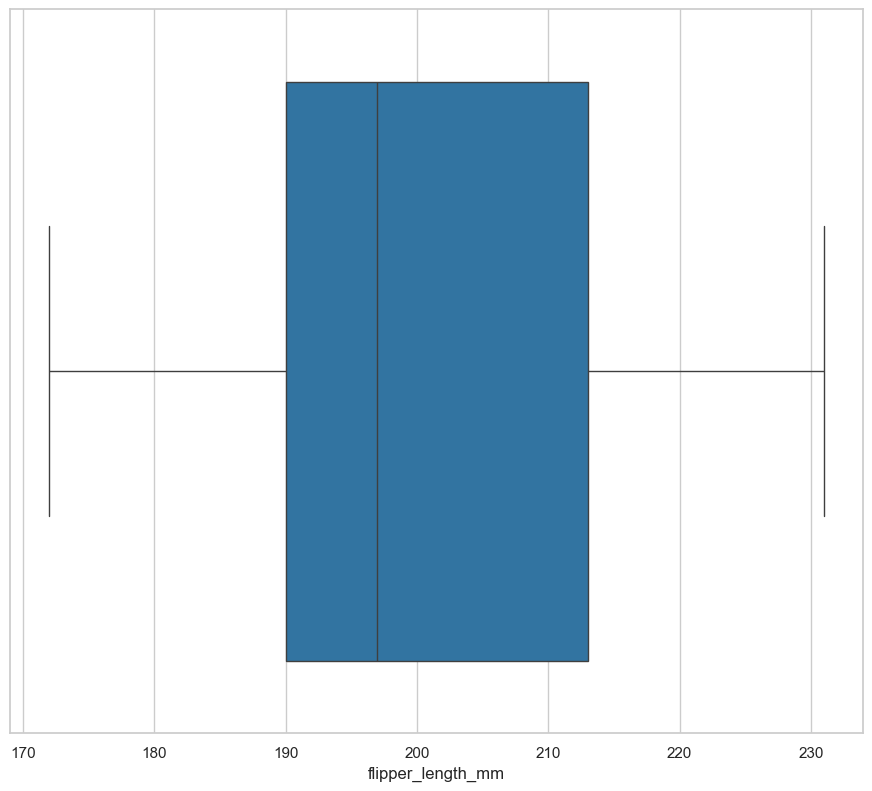

In [100]:
sns.boxplot(data=prepocess_penguins_df, x='flipper_length_mm')

## Distribuciones: PMFs, CDFs y PDFs

### Funciones de probabilidad de masas (PMFs)

#### Utilizando seaborn

<Axes: xlabel='flipper_length_mm', ylabel='Probability'>

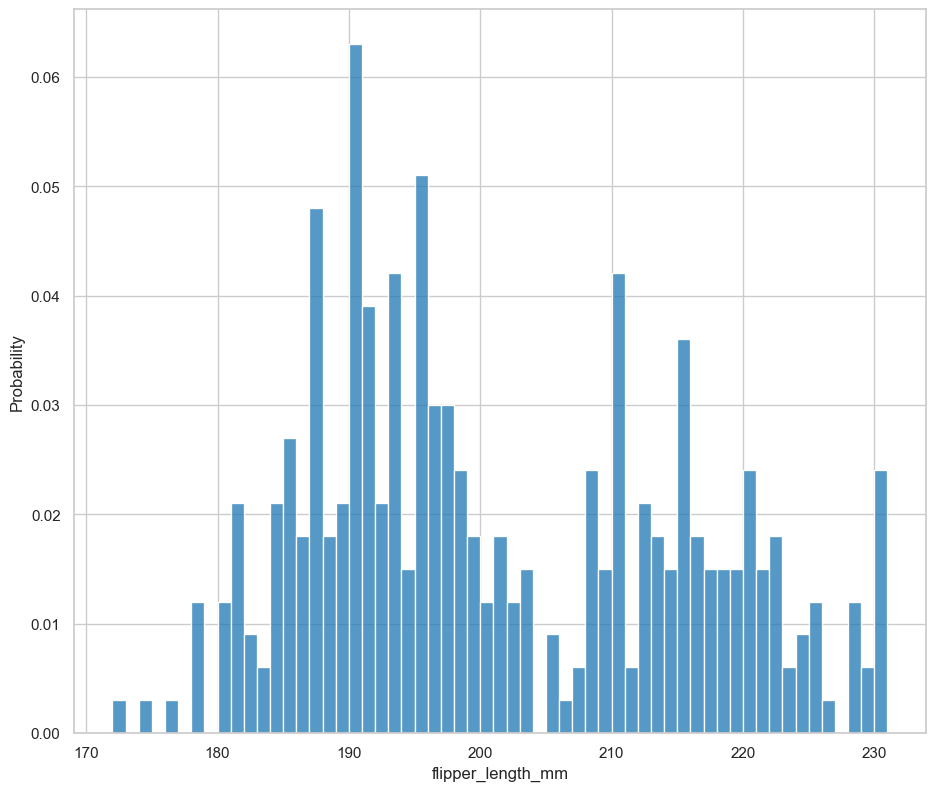

In [101]:
sns.histplot(data=processed_penguins_df, x='flipper_length_mm', binwidth=1, stat='probability')

#### Utilizando empiricaldist

In [102]:
pmf_flipper_length = empiricaldist.Pmf.from_seq(processed_penguins_df.flipper_length_mm, normalize=True)

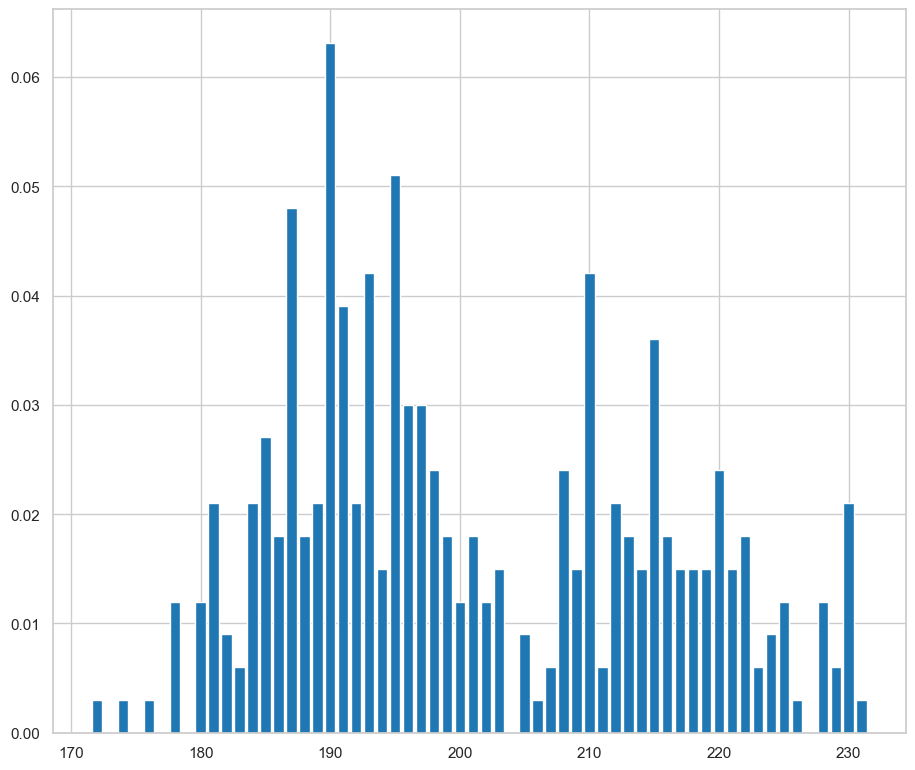

In [103]:
pmf_flipper_length.bar()

In [104]:
pmf_flipper_length(190)

np.float64(0.06306306306306306)

#### Funciones empiricas de probabilidad acumulada (ECDFs)

<Axes: xlabel='flipper_length_mm', ylabel='Proportion'>

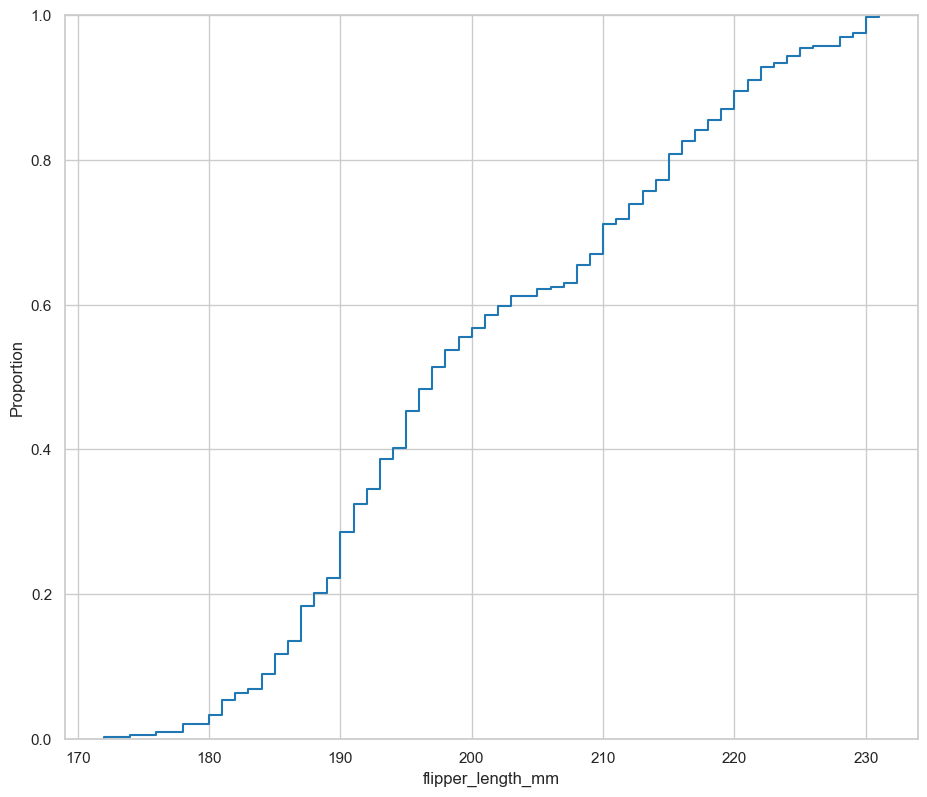

In [105]:
sns.ecdfplot(data=processed_penguins_df, x='flipper_length_mm')

#### Utilizando empiricaldist

In [106]:
cdf_flipper_length = empiricaldist.Cdf.from_seq(processed_penguins_df.flipper_length_mm, normalize=True)

<Axes: xlabel='flipper_length_mm'>

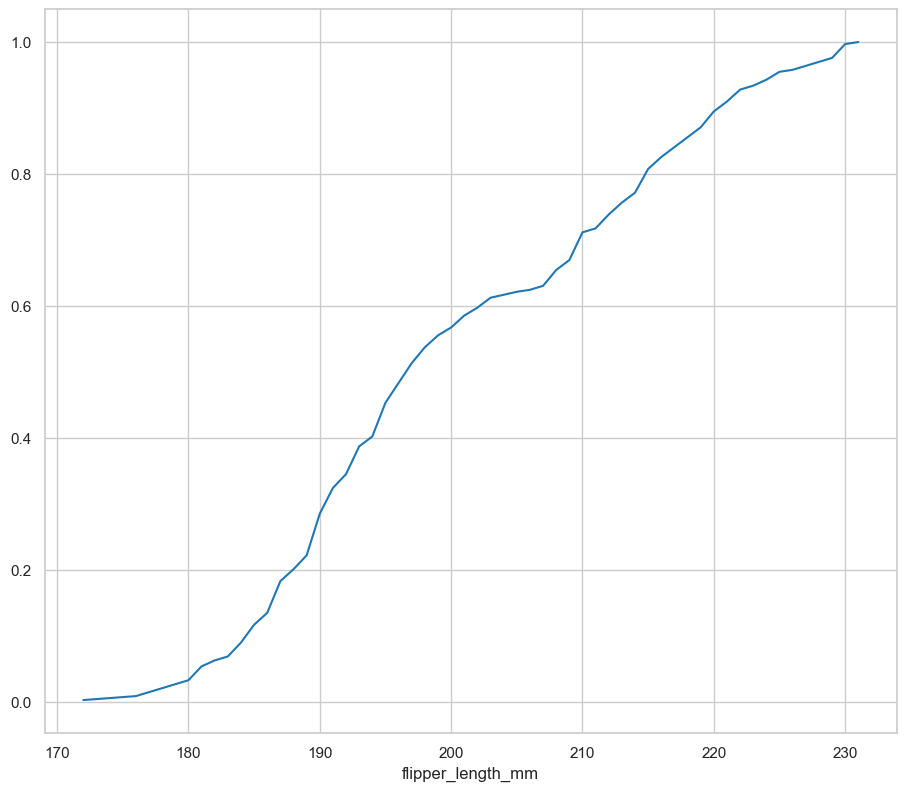

In [107]:
cdf_flipper_length.plot()

## Ley de los grandes numeros y teorema del limite central

#### Ley de los grandes Numeros

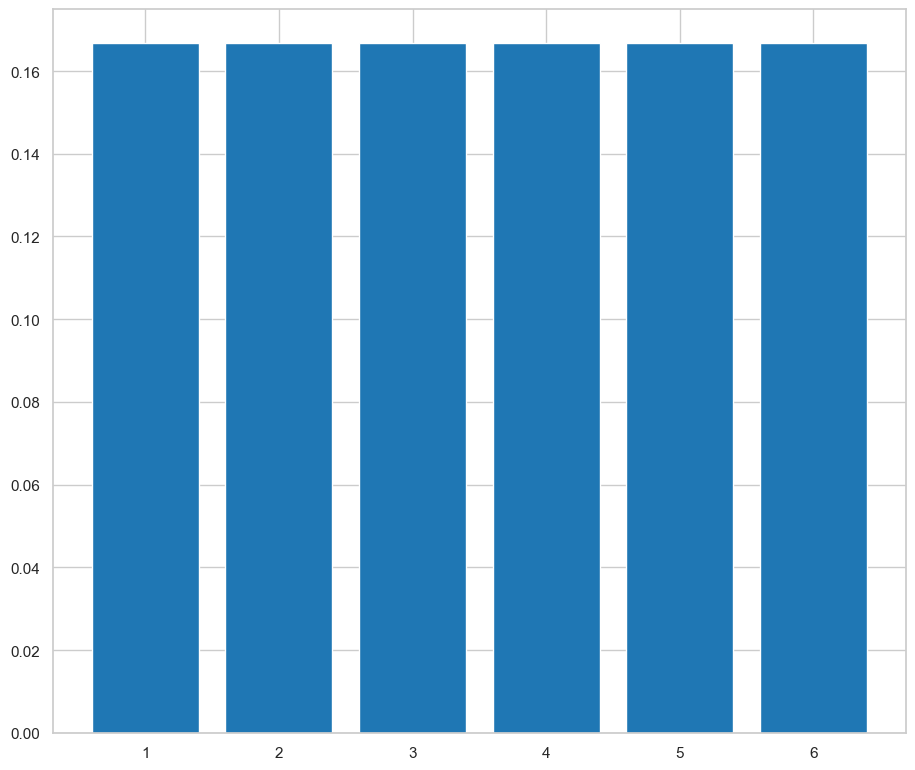

In [108]:
dice = empiricaldist.Pmf.from_seq([1, 2, 3, 4, 5, 6])
dice.bar()

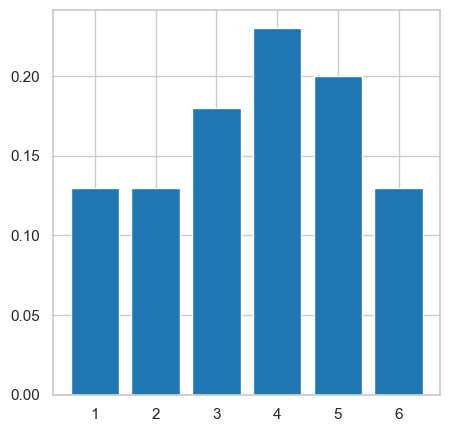

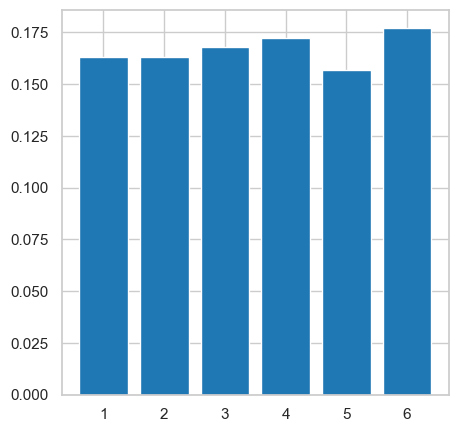

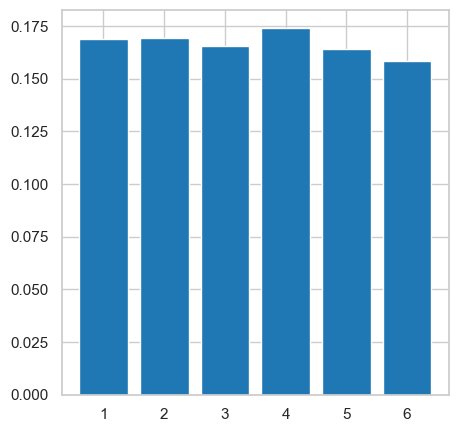

In [109]:
for sample_size in (1e2, 1e3, 1e4):
    sample_size = int(sample_size)
    values = dice.sample(sample_size)
    sample_pmf = empiricaldist.Pmf.from_seq(values)

    plt.figure(figsize=(5, 5))
    sample_pmf.bar()

### Teorema del limite central

In [110]:
processed_penguins_df.sex.value_counts(normalize=True)

sex
male      0.504505
female    0.495495
Name: proportion, dtype: float64

## Estableciendo relaciones: Grafico de puntos

<Axes: xlabel='bill_length_mm', ylabel='bill_depth_mm'>

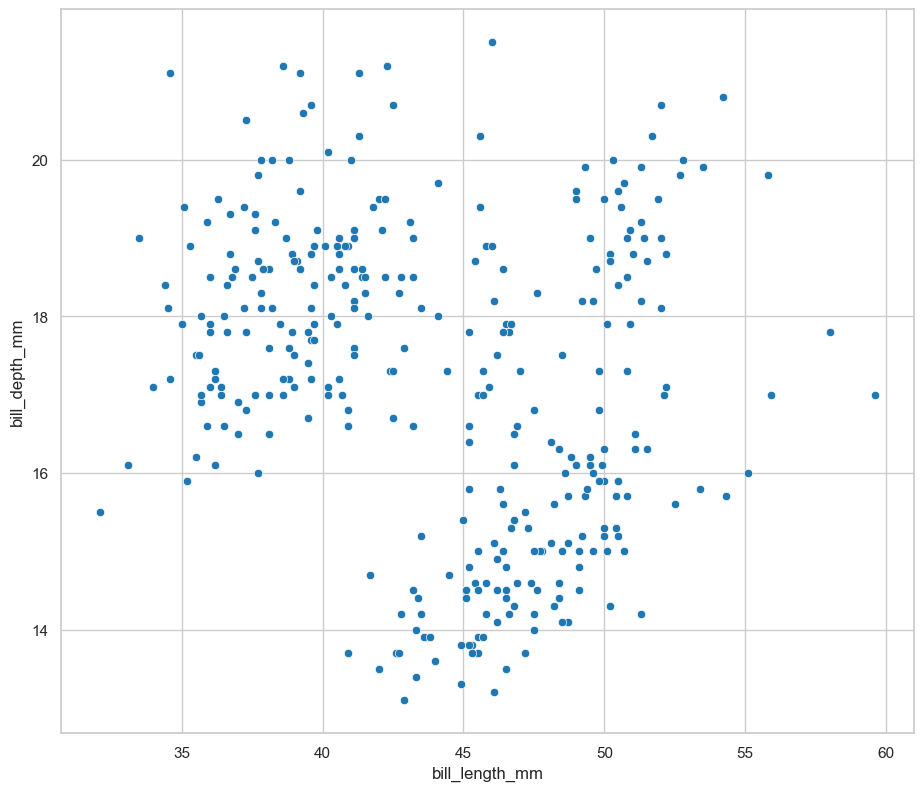

In [111]:
sns.scatterplot(data=processed_penguins_df, x='bill_length_mm', y='bill_depth_mm')

<Axes: xlabel='bill_length_mm', ylabel='bill_depth_mm'>

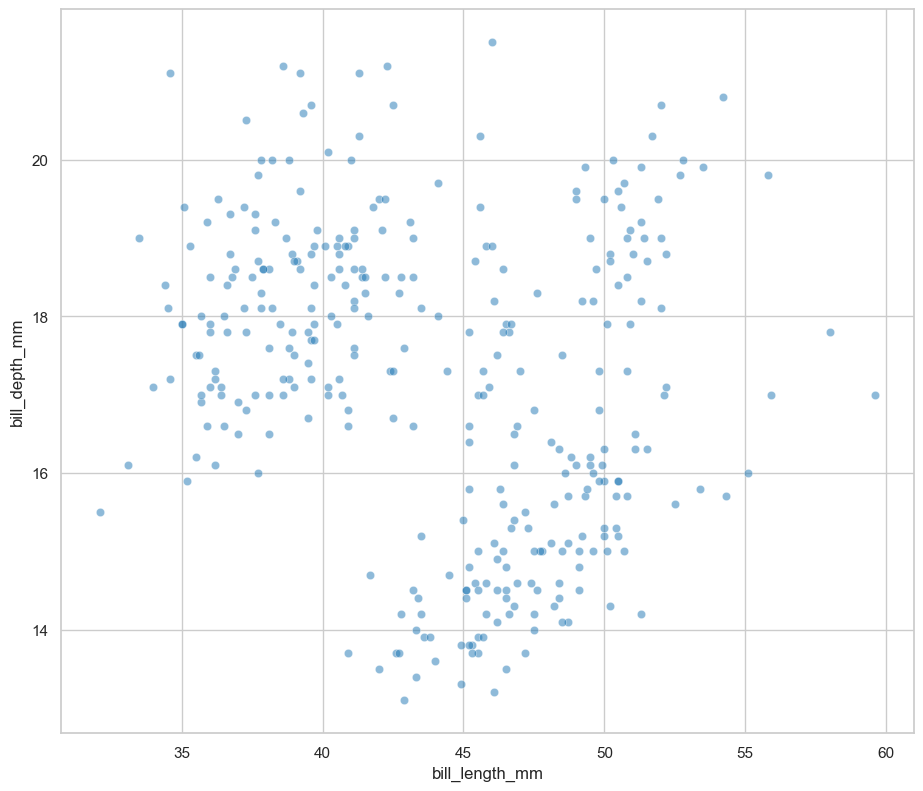

In [112]:
sns.scatterplot(data=processed_penguins_df, x='bill_length_mm', y='bill_depth_mm', alpha=1/2)

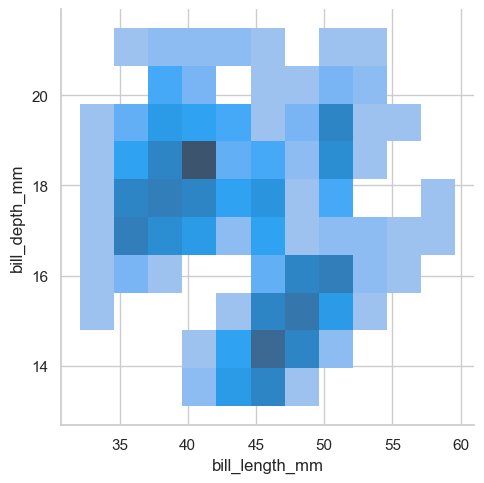

In [113]:
sns.displot(data=processed_penguins_df, x='bill_length_mm', y='bill_depth_mm')

## Estableciendo relaciones: Graficos de violin y boxplot

<Axes: xlabel='species', ylabel='flipper_length_mm'>

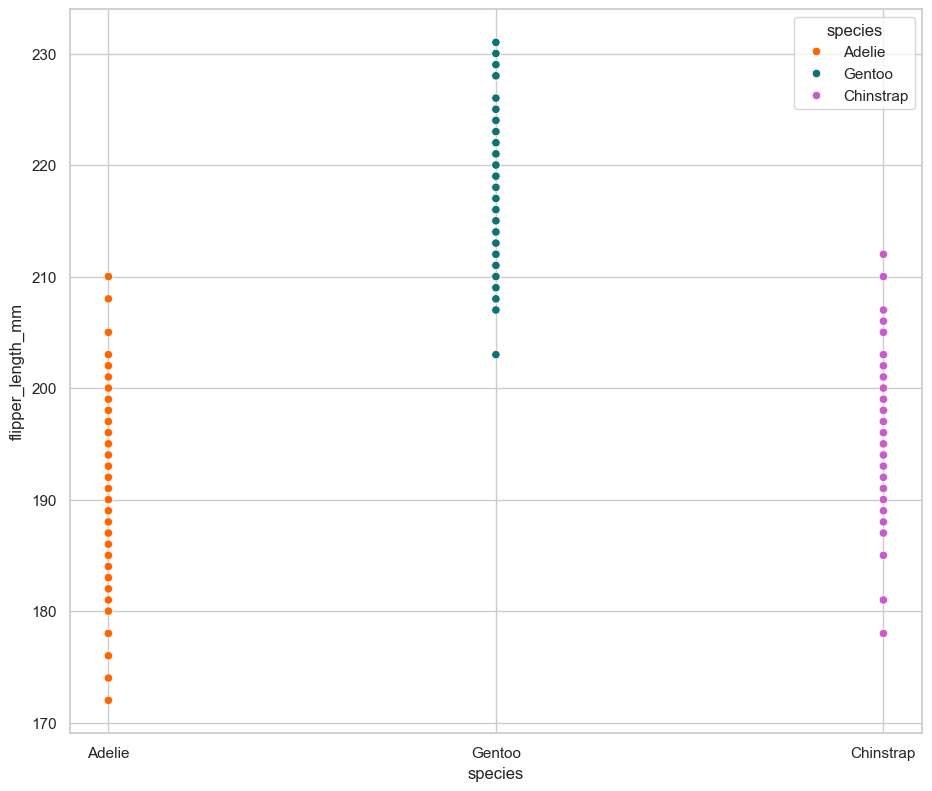

In [114]:
sns.scatterplot(data=processed_penguins_df, x='species', y='flipper_length_mm', hue='species', palette=penguin_color)

<Axes: xlabel='species', ylabel='flipper_length_mm'>

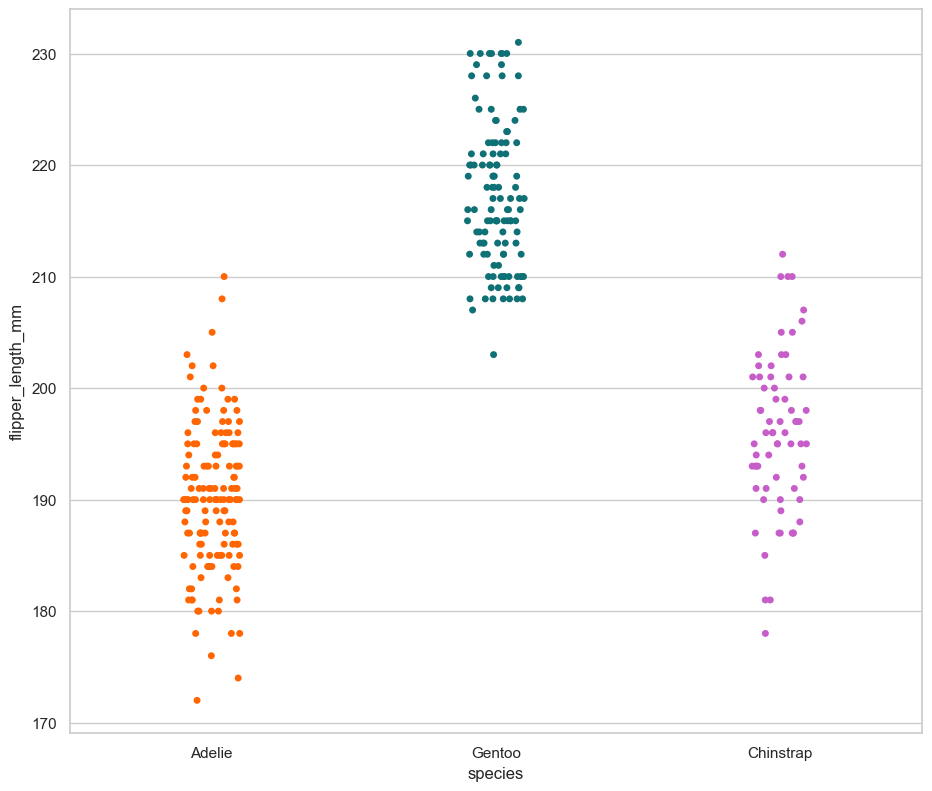

In [115]:
sns.stripplot(data=processed_penguins_df, x='species', y='flipper_length_mm', palette=penguin_color, hue='species')

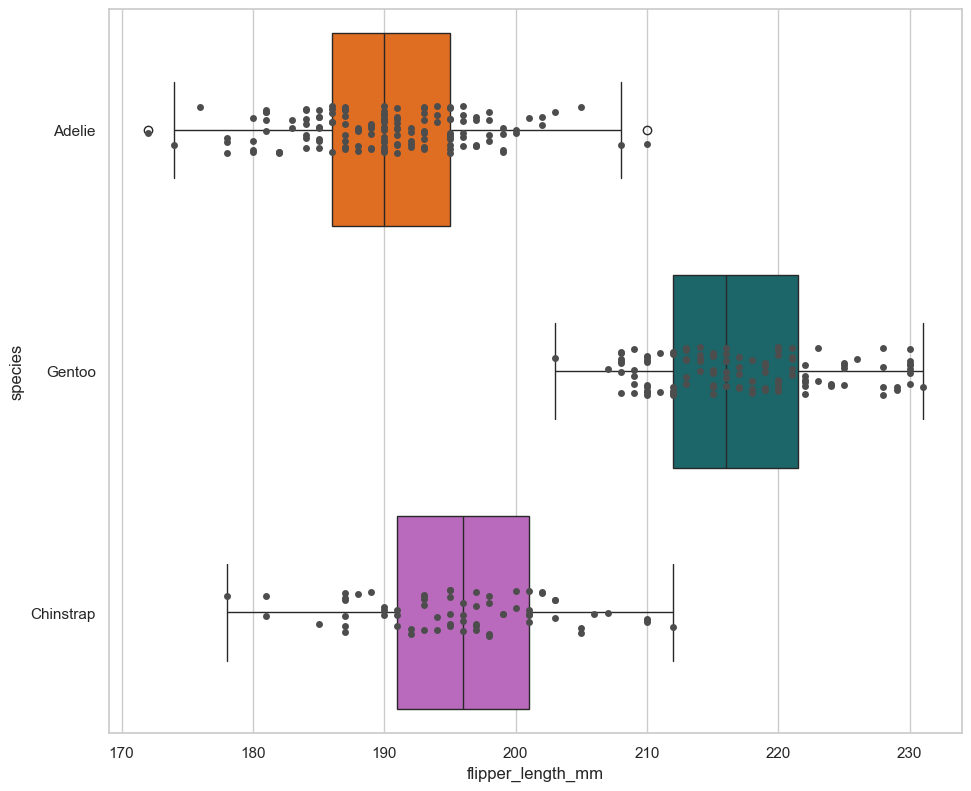

In [116]:
ax = sns.boxplot(data=processed_penguins_df, y='species', x='flipper_length_mm', palette=penguin_color, hue='species')
ax = sns.stripplot(data=processed_penguins_df, x = 'flipper_length_mm', y = 'species', color='.3' )

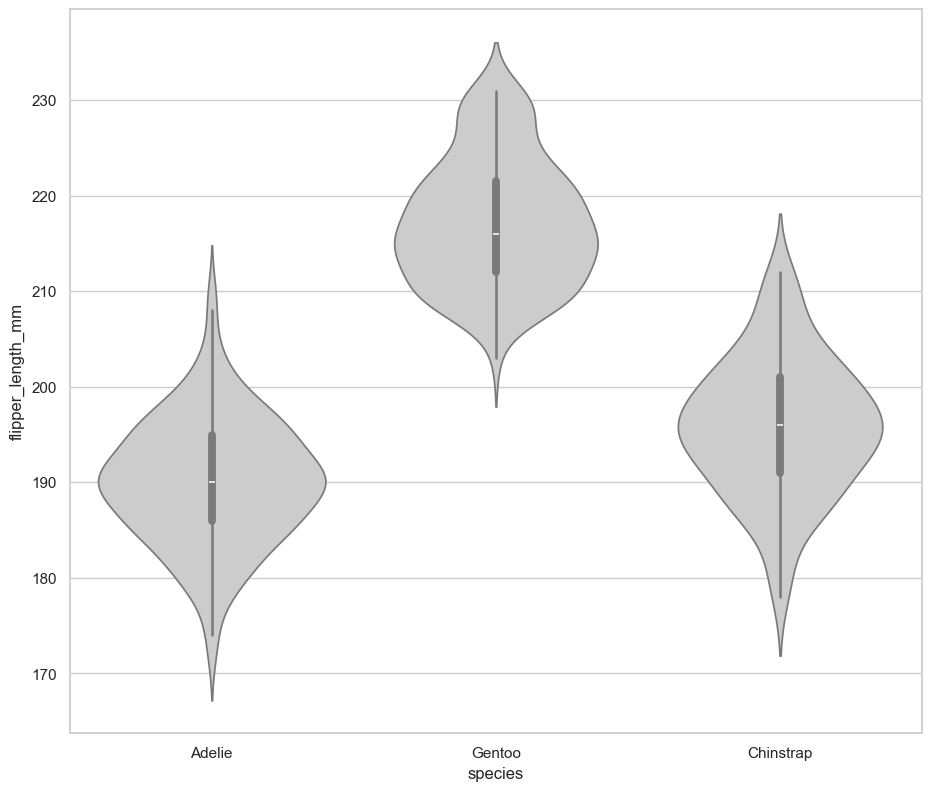

In [117]:
ax = sns.violinplot(data=processed_penguins_df, x='species', y='flipper_length_mm', color='.8')

## Estableciendo relaciones: Matrices de correlacion

#### ¿Existe una correlacion lineal entre alguna de nuestras variables?

In [118]:
processed_penguins_df.select_dtypes(include=[np.number]).corr()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
bill_length_mm,1.000000,-0.228626,0.653096,0.589451,0.032657
bill_depth_mm,-0.228626,1.000000,-0.577792,-0.472016,-0.048182
flipper_length_mm,0.653096,-0.577792,1.000000,0.872979,0.151068
body_mass_g,0.589451,-0.472016,0.872979,1.000000,0.021862
year,0.032657,-0.048182,0.151068,0.021862,1.000000


#### ¿Como puedo visualizar los coeficientes de correlacion?

<Axes: >

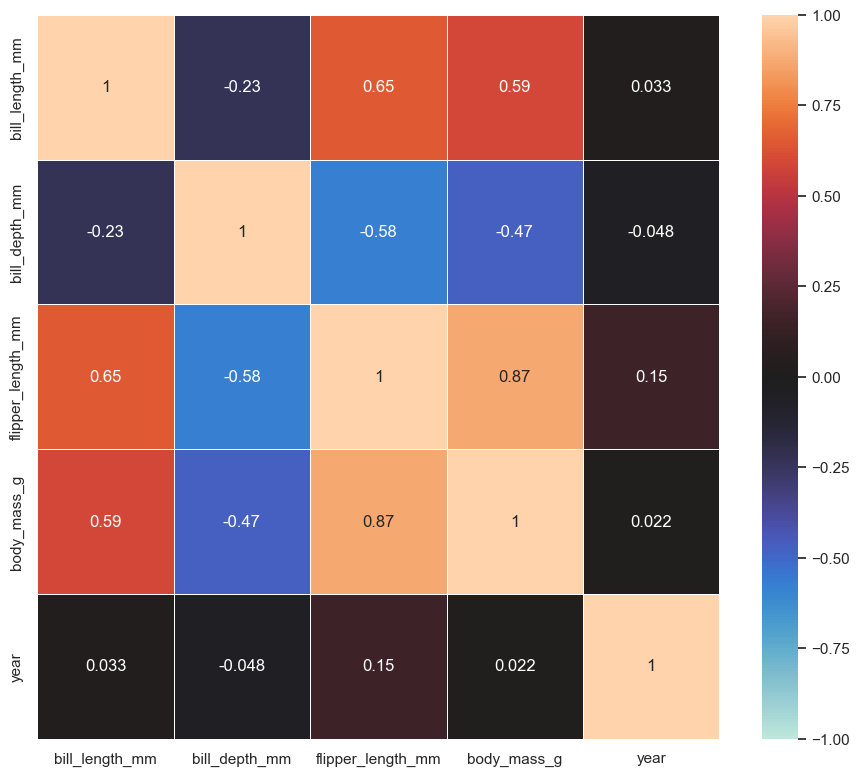

In [119]:
# Select only numeric columns for correlation
numeric_corr = processed_penguins_df.select_dtypes(include=[np.number]).corr()

# Plot the heatmap
sns.heatmap(data=numeric_corr, center=0, vmin=-1, vmax=1, linewidths=0.5, annot=True)

## ¿Cuales son algunas limitantes de los coeficientes de correlacion lineal?

#### Solo nos ayuda a determinar la posible existencia de una correlacion lineal; sin embargo, su ausencia no exista otro tipo de correlacion

array([[ 1.       , -0.0086173],
       [-0.0086173,  1.       ]])

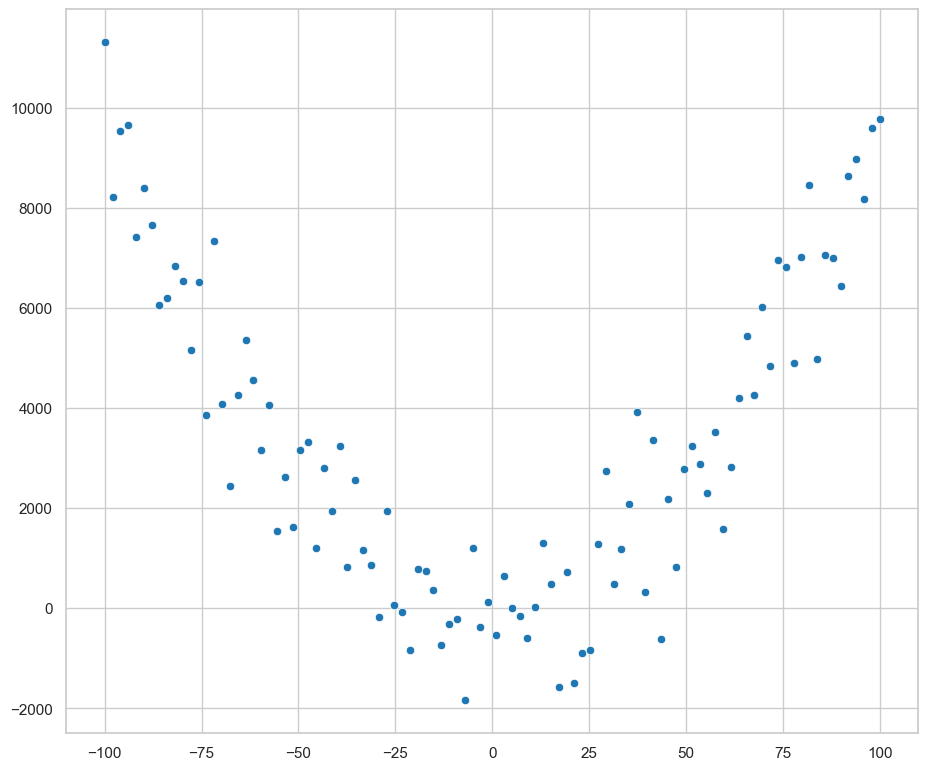

In [120]:
x = np.linspace(-100, 100, 100)
y = x**2
y += np.random.normal(0, 1000, x.size)

sns.scatterplot(x=x, y=y)

np.corrcoef(x, y)

array([[1.        , 0.91669905],
       [0.91669905, 1.        ]])

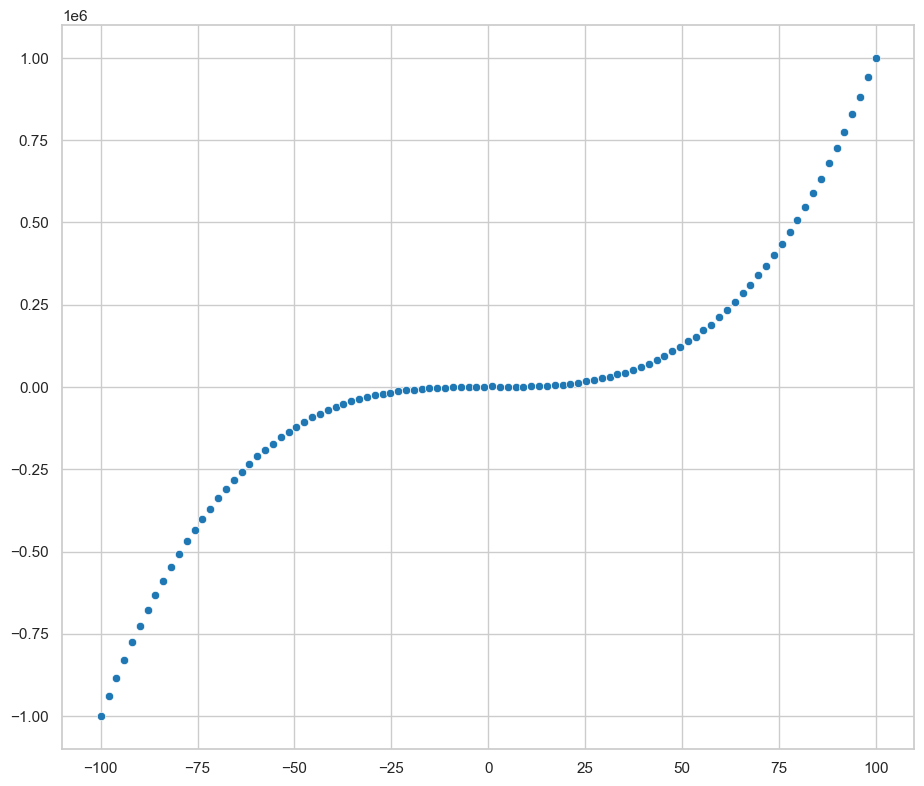

In [121]:
x = np.linspace(-100, 100, 100)
y = x**3
y += np.random.normal(0, 1000, x.size)

sns.scatterplot(x=x, y=y)

np.corrcoef(x, y)

## Limitaciones del analisis de regresion simple

#### La refresion lineal simple no es simetrica

In [122]:
x = processed_penguins_df.bill_length_mm
y = processed_penguins_df.bill_depth_mm

result_x_y = scipy.stats.linregress(x=x, y=y)
result_y_x = scipy.stats.linregress(x=y, y=x)

print(result_x_y, result_y_x, sep='\n')

LinregressResult(slope=np.float64(-0.08232675339862275), intercept=np.float64(20.786648668433827), rvalue=np.float64(-0.22862563591302915), pvalue=np.float64(2.528289720944301e-05), stderr=np.float64(0.01926834673577885), intercept_stderr=np.float64(0.8541730787409798))
LinregressResult(slope=np.float64(-0.6349051704195029), intercept=np.float64(54.890854245047564), rvalue=np.float64(-0.22862563591302915), pvalue=np.float64(2.528289720944301e-05), stderr=np.float64(0.1485977821662332), intercept_stderr=np.float64(2.5673415135382576))


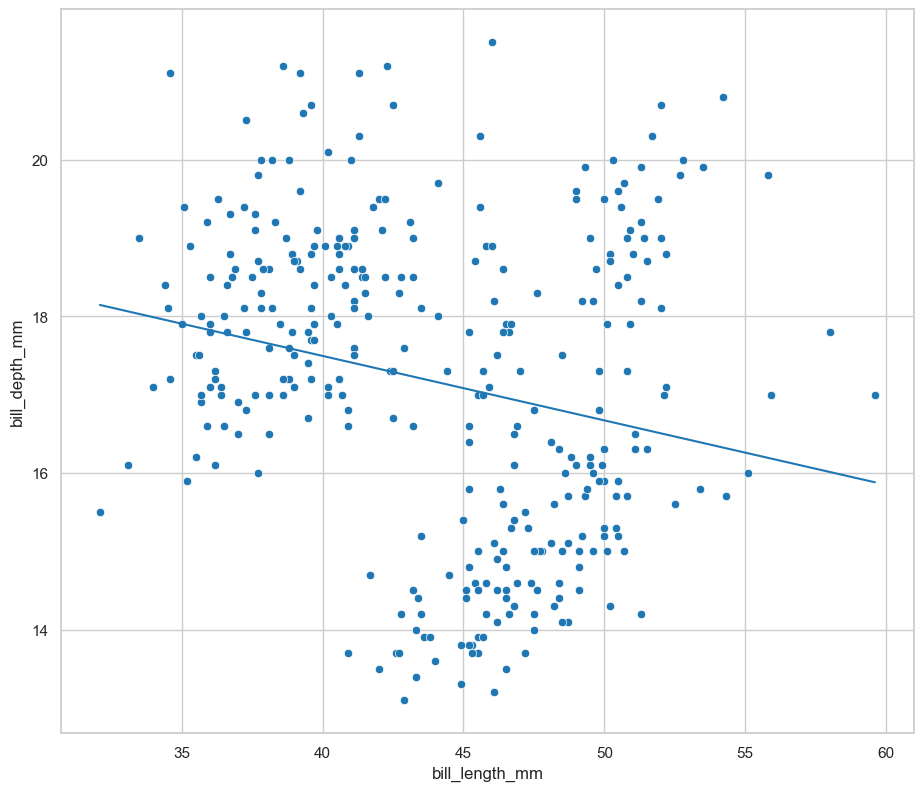

In [123]:
sns.scatterplot(x=x, y=y)

fx_1 = np.array([x.min(), x.max()])
fy_1 = result_x_y.intercept + result_x_y.slope * fx_1

plt.plot(fx_1, fy_1)

#### La regresion no nos dice nada sobre la casualidad, pero existen herramientas para separar las relaciones entre multiples variables

In [124]:
smf.ols(formula='bill_length_mm ~ bill_depth_mm', data=processed_penguins_df).fit().params

Intercept        54.890854
bill_depth_mm    -0.634905
dtype: float64

# Analisis de regresion multiple

### Olvide mi bascula para pesar a los pinguinos ¿Cuál sería la mejor forma de capturar ese dato?

#### Creando modelos

##### Modelo 1

In [125]:
model_1 = smf.ols(formula='bill_length_mm ~ bill_depth_mm', data=processed_penguins_df).fit()
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         bill_length_mm   R-squared:                       0.052
Model:                            OLS   Adj. R-squared:                  0.049
Method:                 Least Squares   F-statistic:                     18.26
Date:                Thu, 24 Apr 2025   Prob (F-statistic):           2.53e-05
Time:                        18:13:08   Log-Likelihood:                -1028.8
No. Observations:                 333   AIC:                             2062.
Df Residuals:                     331   BIC:                             2069.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        54.8909      2.567     21.380      0.000      49.840      59.941
bill_depth_mm    -0.6349      0.149     -4.273      0.000      -0.927      -0.343
==============================================================================
Omnibus:                        8.999   Durbin-Watson:                   1.141
Prob(Omnibus):                  0.011   Jarque-Bera (JB):                6.946
Skew:                           0.251   Prob(JB):                       0.0310
Kurtosis:                       2.501   Cond. No.                         152.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##### Modelo 2

In [126]:
model_2 = smf.ols(formula='bill_length_mm ~ bill_depth_mm + bill_depth_mm', data=processed_penguins_df).fit()
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         bill_length_mm   R-squared:                       0.052
Model:                            OLS   Adj. R-squared:                  0.049
Method:                 Least Squares   F-statistic:                     18.26
Date:                Thu, 24 Apr 2025   Prob (F-statistic):           2.53e-05
Time:                        18:13:08   Log-Likelihood:                -1028.8
No. Observations:                 333   AIC:                             2062.
Df Residuals:                     331   BIC:                             2069.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        54.8909      2.567     21.380      0.000      49.840      59.941
bill_depth_mm    -0.6349      0.149     -4.273      0.000      -0.927      -0.343
==============================================================================
Omnibus:                        8.999   Durbin-Watson:                   1.141
Prob(Omnibus):                  0.011   Jarque-Bera (JB):                6.946
Skew:                           0.251   Prob(JB):                       0.0310
Kurtosis:                       2.501   Cond. No.                         152.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##### Modelo 3

In [127]:
model_3 = smf.ols(formula='bill_length_mm ~ bill_depth_mm + bill_depth_mm + flipper_length_mm', data=processed_penguins_df).fit()
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         bill_length_mm   R-squared:                       0.460
Model:                            OLS   Adj. R-squared:                  0.456
Method:                 Least Squares   F-statistic:                     140.4
Date:                Thu, 24 Apr 2025   Prob (F-statistic):           7.58e-45
Time:                        18:13:08   Log-Likelihood:                -935.27
No. Observations:                 333   AIC:                             1877.
Df Residuals:                     330   BIC:                             1888.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           -27.9762      5.600     -4.996      0.000     -38.992     -16.960
bill_depth_mm         0.6200      0.138      4.504      0.000       0.349       0.891
flipper_length_mm     0.3052      0.019     15.776      0.000       0.267       0.343
==============================================================================
Omnibus:                       26.539   Durbin-Watson:                   0.897
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               35.901
Skew:                           0.585   Prob(JB):                     1.60e-08
Kurtosis:                       4.103   Cond. No.                     5.13e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.13e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

##### Modelo 4

In [128]:
model_3 = smf.ols(formula='bill_length_mm ~ bill_depth_mm + bill_depth_mm + flipper_length_mm + C(sex)', data=processed_penguins_df).fit()
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         bill_length_mm   R-squared:                       0.467
Model:                            OLS   Adj. R-squared:                  0.462
Method:                 Least Squares   F-statistic:                     96.03
Date:                Thu, 24 Apr 2025   Prob (F-statistic):           1.16e-44
Time:                        18:13:08   Log-Likelihood:                -933.06
No. Observations:                 333   AIC:                             1874.
Df Residuals:                     329   BIC:                             1889.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           -17.8795      7.368     -2.427      0.016     -32.373      -3.386
C(sex)[T.male]        1.2662      0.605      2.094      0.037       0.077       2.456
bill_depth_mm         0.3686      0.182      2.024      0.044       0.010       0.727
flipper_length_mm     0.2732      0.025     11.125      0.000       0.225       0.322
==============================================================================
Omnibus:                       31.668   Durbin-Watson:                   0.798
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               43.505
Skew:                           0.669   Prob(JB):                     3.57e-10
Kurtosis:                       4.160   Cond. No.                     6.79e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.79e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Visualizando resultados

#### Creacion de tabla de resultados

In [129]:
models_results = pd.DataFrame(dict(actual_value= processed_penguins_df.body_mass_g, prediction_model_1 = model_1.predict(), prediction_model_2 = model_2.predict(), prediction_model_3 = model_3.predict()))

models_results

,actual_value,prediction_model_1,prediction_model_2,prediction_model_3
0,3750.0,43.018128,43.018128,39.730943
1,3800.0,43.843504,43.843504,39.351585
2,3250.0,43.462561,43.462561,42.031643
4,3450.0,42.637184,42.637184,41.964457
5,3650.0,41.811808,41.811808,42.890231
...,...,...,...,...
339,4000.0,42.319732,42.319732,47.239862
340,3400.0,43.399071,43.399071,43.980966
341,3775.0,43.335580,43.335580,42.825123
342,4100.0,42.827656,42.827656,47.764576


## Analisis de regresion logistica

#### ¿Podemos crear un modelo que nos ayude a definir si un pinguino es macho o hembra?

In [131]:
# Create a numeric column for sex
processed_penguins_df['numeric_sex'] = processed_penguins_df['sex'].map({'female': 0, 'male': 1})

# Fit the logistic regression model
smf.logit(formula='numeric_sex ~ flipper_length_mm + bill_length_mm + bill_depth_mm + C(island)', data=processed_penguins_df).fit().summary()

Optimization terminated successfully.
         Current function value: 0.360900
         Iterations 7


C:\Users\david\AppData\Local\Temp\ipykernel_17228\256148679.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  processed_penguins_df['numeric_sex'] = processed_penguins_df['sex'].map({'female': 0, 'male': 1})


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            numeric_sex   No. Observations:                  333
Model:                          Logit   Df Residuals:                      327
Method:                           MLE   Df Model:                            5
Date:                Thu, 24 Apr 2025   Pseudo R-squ.:                  0.4793
Time:                        18:18:55   Log-Likelihood:                -120.18
converged:                       True   LL-Null:                       -230.80
Covariance Type:            nonrobust   LLR p-value:                 8.021e-46
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                -61.4464      6.944     -8.849      0.000     -75.057     -47.836
C(island)[T.Dream]        -1.5596      0.493     -3.163      0.002      -2.526      -0.593
C(island)[T.Torgersen]    -1.0323      0.599     -1.725      0.085      -2.205       0.141
flipper_length_mm          0.1393      0.024      5.874      0.000       0.093       0.186
bill_length_mm             0.1413      0.045      3.150      0.002       0.053       0.229
bill_depth_mm              1.6401      0.185      8.864      0.000       1.277       2.003
==========================================================================================
"""

#### Exploracion de nuestras variables categoricas

In [132]:
processed_penguins_df.value_counts(['island', 'sex']).reset_index(name='count')

,island,sex,count
0,Biscoe,male,83
1,Biscoe,female,80
2,Dream,male,62
3,Dream,female,61
4,Torgersen,female,24
5,Torgersen,male,23


#### ¿Podemos definir un modelo que nos ayude a identificar si un pinguino pertenece a determinada especie?

In [134]:
processed_penguins_df.species.unique()

array(['Adelie', 'Gentoo', 'Chinstrap'], dtype=object)

In [135]:
processed_penguins_df= prepocess_penguins_df.assign(island=lambda df: df.island.replace(['Adelie', 'Gentoo', 'Chinstrap'], [1, 0, 0]))

In [137]:
# Add a new column to indicate if the penguin is of the Adelie species
processed_penguins_df['is_adelie'] = (processed_penguins_df['species'] == 'Adelie').astype(int)

# Fit the logistic regression model
model_is_adelie = smf.logit(formula='is_adelie ~ flipper_length_mm + C(sex)', data=processed_penguins_df).fit()

Optimization terminated successfully.
         Current function value: 0.355225
         Iterations 8


In [138]:
model_is_adelie.params

Intercept            40.568368
C(sex)[T.male]        1.282656
flipper_length_mm    -0.209705
dtype: float64